# When Not to Use Linear Regression in R

Hello Beautiful People!  

Linear Regression tends to receive less love than its other peers because of the conception that Linear Regression is far too simple to be of any use for meaningful prediction tasks; however, Linear Regression is nonetheless a great way to begin many analytical tasks for because of how simple it is to incorporate.  

**But, how does one know when to use it?**

Below, we demonstrate how to quickly identify if a Linear Regression model is appropriate to use.  This is done with the Boston Housing dataset from the mlbench package with the goal to predict the "medv" variable, or the median value of owner occupied homes in UDS 1000.  More info can be found here:  https://rdrr.io/cran/mlbench/man/BostonHousing.html

There are a few ways to quickly identify if a Linear Regression model will be a good fit.  Below we explore two:
1. A correlation matrix
2. A visual plot

Finally, we conclude this notebook with a quick Linear Regression model to see how it held up in terms of performance.

In [1]:
#We disable warnings in advance for brevity; this isn't normally recommeded
defaultW <- getOption("warn") 
options(warn = -1) 

#You may need to install the package first before viewing the data:  install.packages("mlbench")
library(mlbench)
data(BostonHousing2)

#view the first few rows of the dataset as well as its properties
head(BostonHousing2)
str(BostonHousing2)

town,tract,lon,lat,medv,cmedv,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
Nahant,2011,-70.9550,42.2550,24.0,24.0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
Swampscott,2021,-70.9500,42.2875,21.6,21.6,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
Swampscott,2022,-70.9360,42.2830,34.7,34.7,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
Marblehead,2031,-70.9280,42.2930,33.4,33.4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
Marblehead,2032,-70.9220,42.2980,36.2,36.2,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
Marblehead,2033,-70.9165,42.3040,28.7,28.7,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


'data.frame':	506 obs. of  19 variables:
 $ town   : Factor w/ 92 levels "Arlington","Ashland",..: 54 77 77 46 46 46 69 69 69 69 ...
 $ tract  : int  2011 2021 2022 2031 2032 2033 2041 2042 2043 2044 ...
 $ lon    : num  -71 -71 -70.9 -70.9 -70.9 ...
 $ lat    : num  42.3 42.3 42.3 42.3 42.3 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 $ cmedv  : num  24 21.6 34.7 33.4 36.2 28.7 22.9 22.1 16.5 18.9 ...
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : int  296 242 242 222 2

### Step 1: Correlation Matrix

Next, we explore some of these variables in greater detail with a sexy correlation matrix.  A correlation matrix is a quick way to identify if a linear relationship exists between variables between a scale of -1 to 1.  -1 means there is a perfect negative relationship, 0 means there is no linear relationship, and 1 means there is a perfect linear relationship.

We temporarily convert the "town" and "chaz" variables to a numeric column for use in the correlation analysis.  This is necessary as we would not be able to perform a correlation analysis with factors if they are not converted otherwise.

In [2]:
#below a copy of the dataset is made while converting the town and chas variables to numeric
corr_data <- BostonHousing2
corr_data$town <- as.numeric(corr_data$town)
corr_data$chas <- as.numeric(corr_data$chas)

corrplot 0.84 loaded


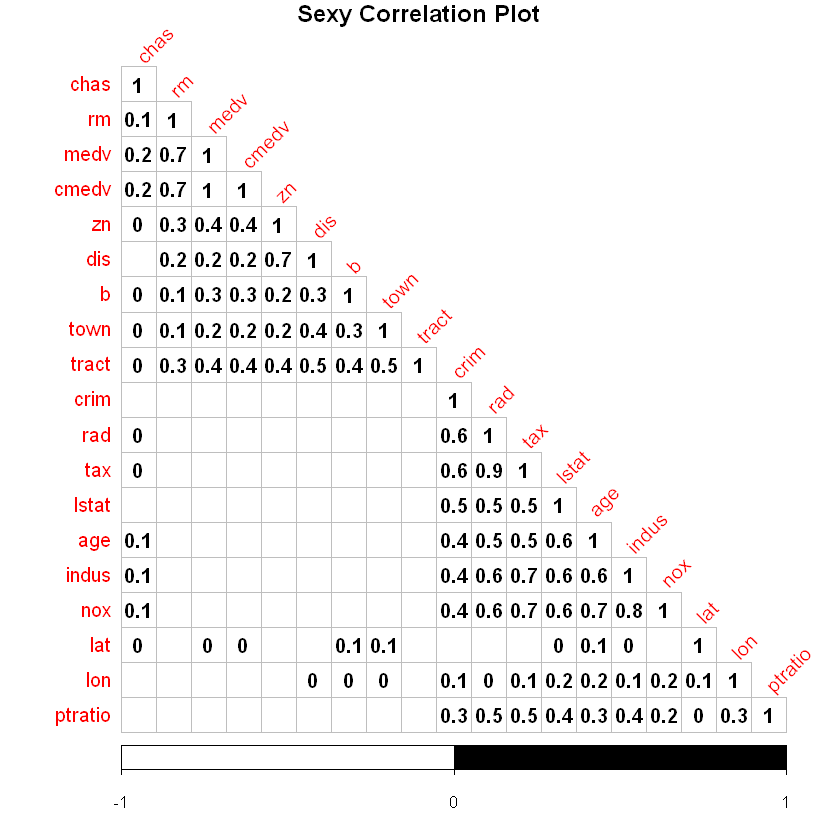

In [3]:
#You may need to install the correlation package first:  install.packages("corrplot")
library(corrplot)

#Here, we round the correlation matrix to 1 decimal place only so it can fit for plotting purposes
#we also purposes "white-out" negative correlations since we are only searching for positive correlations
corr_Matrix <- round(cor(corr_data), 1)
sexy_plot <- corrplot(corr_Matrix, method = "number", 
                      title = "Sexy Correlation Plot",
                      mar=c(0,0,1,0), #this is to correct the title position in the graph
                      type="lower", order="hclust", 
                      col=c("white", "black"),
                      bg="white", tl.srt=45)

The above sexy correlation plot is interesting.  By "whiting-out" negative correlations, we can quickly identify positive correlations and since our target variable is "medv" we can see that there are 7 variables that have any sort of positive relationship with it.  Also, ignoring "cmedv", we can see that the rest of the variables do not have a strong linear relationship with it with the exception of "rm".  

This would suggest that a linear regression model would probably not work well here in predicting our target variable using the rest of the variables.

### Step 2: Visual Plot

Next, we plot the "medv" variable against the two variables with the highest correlations, "zn" and "tract".  This will allow us to quickly gauge if the target variable has a good linear relationship with its fellow variables.  If there is not a strong linear trend, then we can safely assume that a linear regression model probably won't be of much use.

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


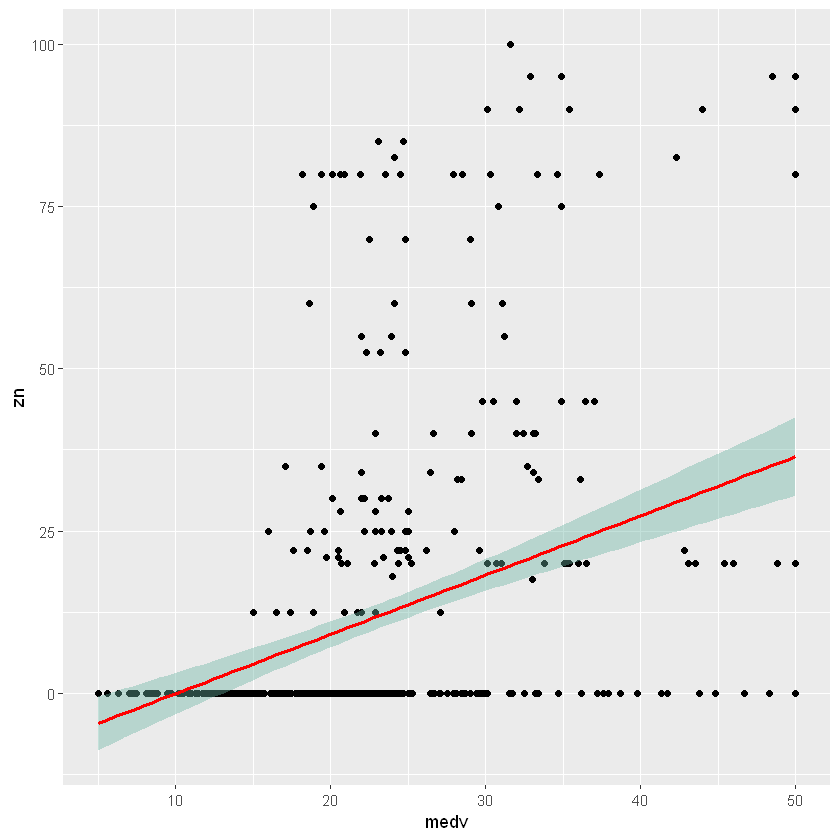

In [4]:
#You may need to install the ggplot2 package first:  install.packages("ggplot2")
library(ggplot2)
sexy_plot2 <- ggplot(corr_data, aes(x=medv, y=zn)) + geom_point() +
                geom_smooth(method=lm, color="red", fill="#69b3a2", se=TRUE) 
sexy_plot2

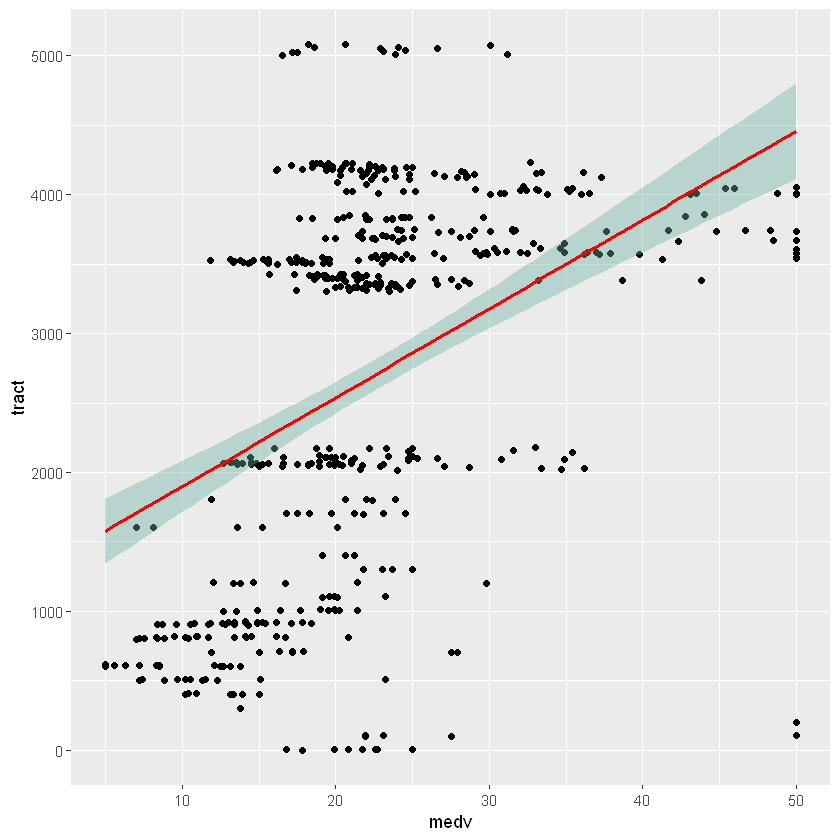

In [5]:
sexy_plot3 <- ggplot(corr_data, aes(x=medv, y=tract)) + geom_point() +
                geom_smooth(method=lm, color="red", fill="#69b3a2", se=TRUE) 
sexy_plot3

The sexy correlation matrix already suggested that, although there is a positive relationship between our target variable "medv" and "zn" and "chas", we can visually see that the linear relationship is not as strong as we would like.  A strong linear relationship is generally considered to have a correlation of .7 or more.

At this point, we can safely conclude that a linear regression won't be of much use here and that we are better off using other regression methods to predict our target variable.  To prove this, however, we go ahead and demonstrate how a linear regression model performs.

### A Quick Linear Regression Model

Below we quickly demonstrate several linear regression models to predict the target variable, "medv".  Again, "medv" is the median price of a house in thousands.  

### A linear model with medv and zn

In [6]:
#create a linear regression model
linearMod <- lm(medv ~ zn, data=BostonHousing2)
print(linearMod)


Call:
lm(formula = medv ~ zn, data = BostonHousing2)

Coefficients:
(Intercept)           zn  
    20.9176       0.1421  



Let's quickly take a look into the model's performance.

In [7]:
#check the linear regression model
summary(linearMod)


Call:
lm(formula = medv ~ zn, data = BostonHousing2)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.918  -5.518  -1.006   2.757  29.082 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.91758    0.42474  49.248   <2e-16 ***
zn           0.14214    0.01638   8.675   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.587 on 504 degrees of freedom
Multiple R-squared:  0.1299,	Adjusted R-squared:  0.1282 
F-statistic: 75.26 on 1 and 504 DF,  p-value: < 2.2e-16


The R-squared (R2) statistic provides a measure of how well the model is fitting the actual data. It takes the form of a proportion of variance. R2 is a measure of the linear relationship between our predictor variable (speed) and our response / target variable (dist). It always lies between 0 and 1 (i.e.: a number near 0 represents a regression that does not explain the variance in the response variable well and a number close to 1 does explain the observed variance in the response variable). In our example, the R2 we get is 0.6510794. Or roughly 65% of the variance found in the response variable (dist) can be explained by the predictor variable (speed). 

There's a lot going on here, but we are only going to focus on the 2nd to last line: The Multiple R-squared and the Adjusted R-squared.

**R-squared** = this metric explains the response data's variance around the mean.  A higher # is better

**Adjusted R-squared** = this is just like R-squared except that it penalizes the model for having too much variables.  Adjusted R-sqared will always be lower than R-squared, but not by much.

1. Both range in terms of value from 0 to 1, with 0 meaning there is no linear relationship to 1 meaning there is a perfect linear relationship
1. Both are very low.  Generally, for there to be a strong linear relationship, we would want to see a value of .7 or higher for either R-squared metrics.

Let's see how this looks visually for our linear model.

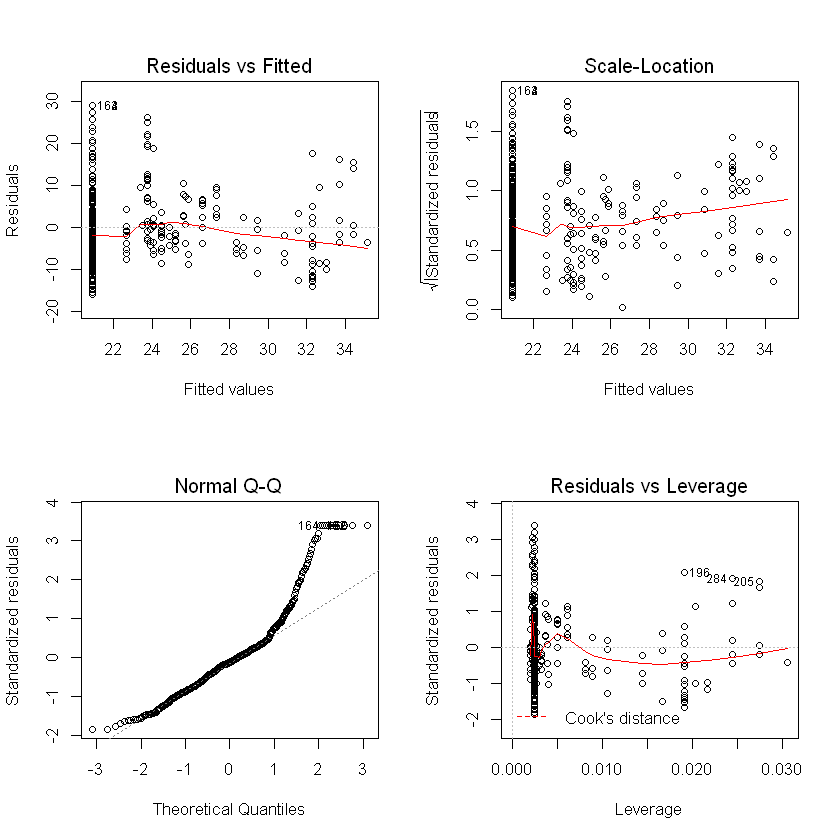

In [8]:
# diagnostic plots
layout(matrix(c(1,2,3,4),2,2)) # optional 4 graphs/page
plot(linearMod)

This is not pretty.  We will only look at the "Residuals vs. Fitted" plot.  We can see that our red line is not close to the dotted line.  This means there is likely no linearity.  We can also see that there is heteroskedasticity, or in other words, the spread of the residuals are not the same across the x-axis.  We can also see a bunch of outliers too.  Outliers will greatly affect any linearity relationship and that is quite evident here.

More info about the rest of the plots can be found here:  https://www.statmethods.net/stats/rdiagnostics.html

We go ahead and repeat the same process for again for our next few models.

### A linear model with medv and chas

In [9]:
#create a linear regression model
linearMod2 <- lm(medv ~ chas, data=BostonHousing2)
print(linearMod2)

#check the linear regression model
summary(linearMod2)


Call:
lm(formula = medv ~ chas, data = BostonHousing2)

Coefficients:
(Intercept)        chas1  
     22.094        6.346  




Call:
lm(formula = medv ~ chas, data = BostonHousing2)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.094  -5.894  -1.417   2.856  27.906 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.0938     0.4176  52.902  < 2e-16 ***
chas1         6.3462     1.5880   3.996 7.39e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.064 on 504 degrees of freedom
Multiple R-squared:  0.03072,	Adjusted R-squared:  0.02879 
F-statistic: 15.97 on 1 and 504 DF,  p-value: 7.391e-05


We can see from the above Multiple R-squared and Adjusted R-squared values that any hint of a linear relationship is basically non-existent.

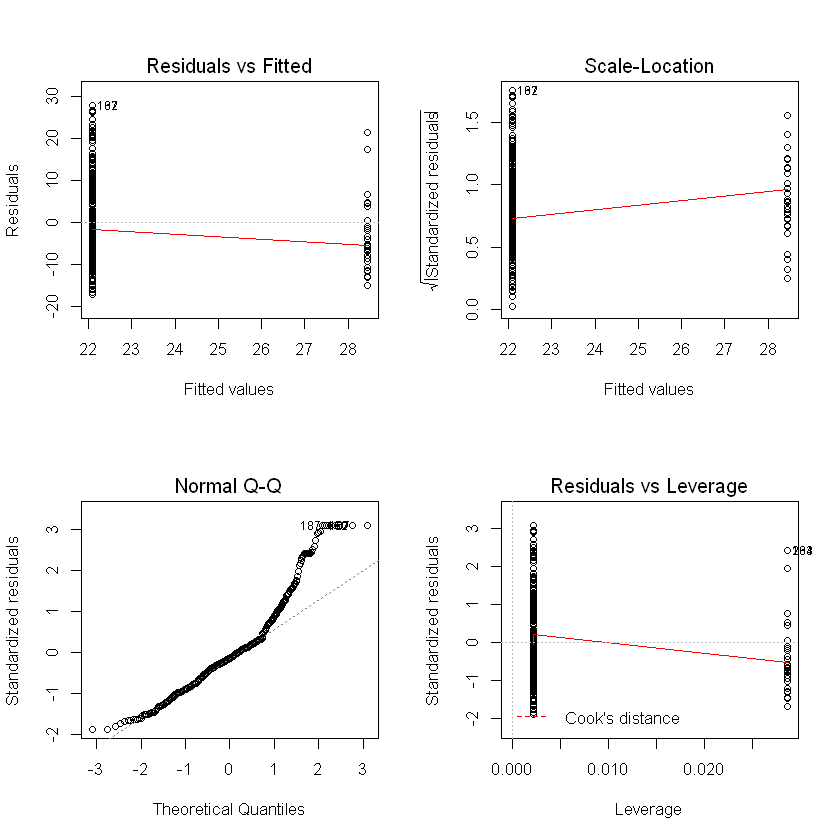

In [10]:
# diagnostic plots
layout(matrix(c(1,2,3,4),2,2)) # optional 4 graphs/page
plot(linearMod2)

Based on the "Residuals vs Fitted" graph, what do you think this diagnostic plot is trying to tell us?

### A linear model with medv and both zn and chas

Let's check out the linear model with two variables now.

In [11]:
#create a linear regression model
linearMod3 <- lm(medv ~ zn + chas, data=BostonHousing2)
print(linearMod3)

#check the linear regression model
summary(linearMod3)


Call:
lm(formula = medv ~ zn + chas, data = BostonHousing2)

Coefficients:
(Intercept)           zn        chas1  
    20.4027       0.1454       6.9160  




Call:
lm(formula = medv ~ zn + chas, data = BostonHousing2)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4027  -5.5027  -0.8027   2.7973  29.5973 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.40265    0.43043  47.401  < 2e-16 ***
zn           0.14536    0.01607   9.046  < 2e-16 ***
chas1        6.91603    1.47549   4.687 3.57e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.414 on 503 degrees of freedom
Multiple R-squared:  0.1663,	Adjusted R-squared:  0.163 
F-statistic: 50.18 on 2 and 503 DF,  p-value: < 2.2e-16


So the above info is interesting.  The Multiple R-squared and the Adjusted R-squared values both increased from the other two models.  This means that if we were forced to use any linear regression model, we would be better off using this one instead of the other two.

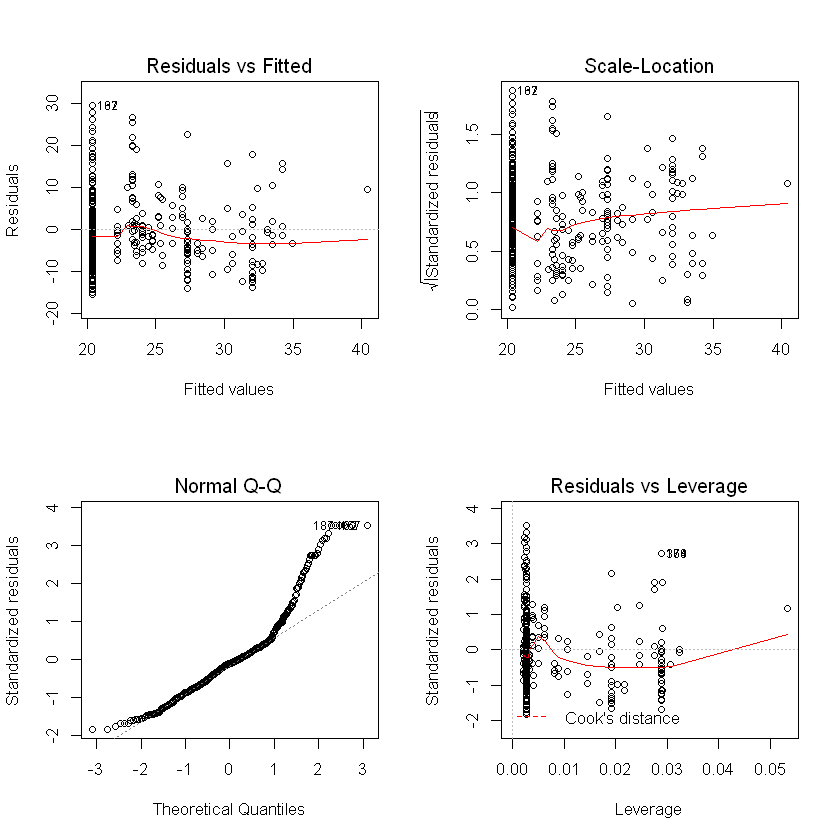

In [12]:
# diagnostic plots
layout(matrix(c(1,2,3,4),2,2)) # optional 4 graphs/page
plot(linearMod3)

### A linear model with rm

We will now show another linear model using the "rm" variable.

In [13]:
#create a linear regression model
linearMod4 <- lm(medv ~ rm,, data=BostonHousing2)
print(linearMod4)

#check the linear regression model
summary(linearMod4)


Call:
lm(formula = medv ~ rm, data = BostonHousing2)

Coefficients:
(Intercept)           rm  
    -34.671        9.102  




Call:
lm(formula = medv ~ rm, data = BostonHousing2)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.346  -2.547   0.090   2.986  39.433 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -34.671      2.650  -13.08   <2e-16 ***
rm             9.102      0.419   21.72   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.616 on 504 degrees of freedom
Multiple R-squared:  0.4835,	Adjusted R-squared:  0.4825 
F-statistic: 471.8 on 1 and 504 DF,  p-value: < 2.2e-16


This is much more promising.  We can see that the Multiple R-squared and the Adjusted R-squared values are much higher than the last 3 models.  Although it is not as high as we would like (.7 or higher), it is much more promising.

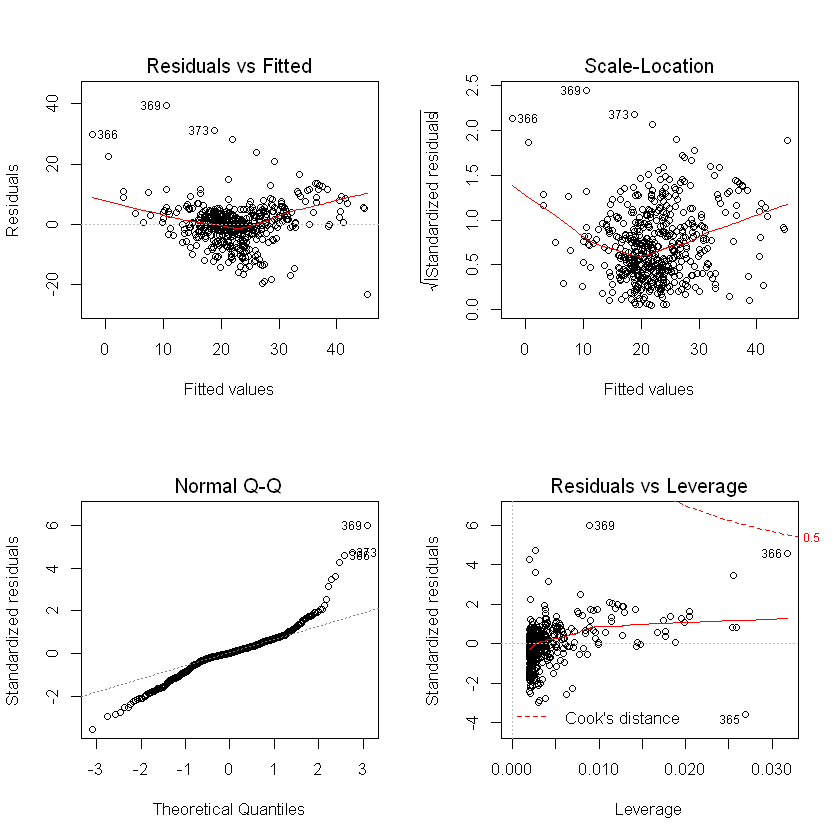

In [14]:
# diagnostic plots
layout(matrix(c(1,2,3,4),2,2)) # optional 4 graphs/page
plot(linearMod4)

The above "Residuals vs Fitted" graph is much sexier than what we've seen previously.  It is much easier to see a linear relationship here.

### A linear model with zn, chas, and rm

We wrap things up by seeing how a linear model will look with all 3 variables taken together.

In [15]:
#create a linear regression model
linearMod5 <- lm(medv ~ zn + chas + rm,, data=BostonHousing2)
print(linearMod5)

#check the linear regression model
summary(linearMod5)


Call:
lm(formula = medv ~ zn + chas + rm, data = BostonHousing2)

Coefficients:
(Intercept)           zn        chas1           rm  
  -30.46972      0.06657      4.52123      8.26353  




Call:
lm(formula = medv ~ zn + chas + rm, data = BostonHousing2)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.705  -3.287   0.239   2.778  39.400 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -30.46972    2.65423 -11.480  < 2e-16 ***
zn            0.06657    0.01285   5.182 3.19e-07 ***
chas1         4.52123    1.12556   4.017 6.80e-05 ***
rm            8.26353    0.42787  19.313  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.38 on 502 degrees of freedom
Multiple R-squared:  0.5217,	Adjusted R-squared:  0.5189 
F-statistic: 182.5 on 3 and 502 DF,  p-value: < 2.2e-16


Take a look at the Multiple R-squared and the Adjusted R-Squared.  This is the highest that we've seen so far out of all the linear models.  This means that if we had to choose just 1 model to use, this would be it.

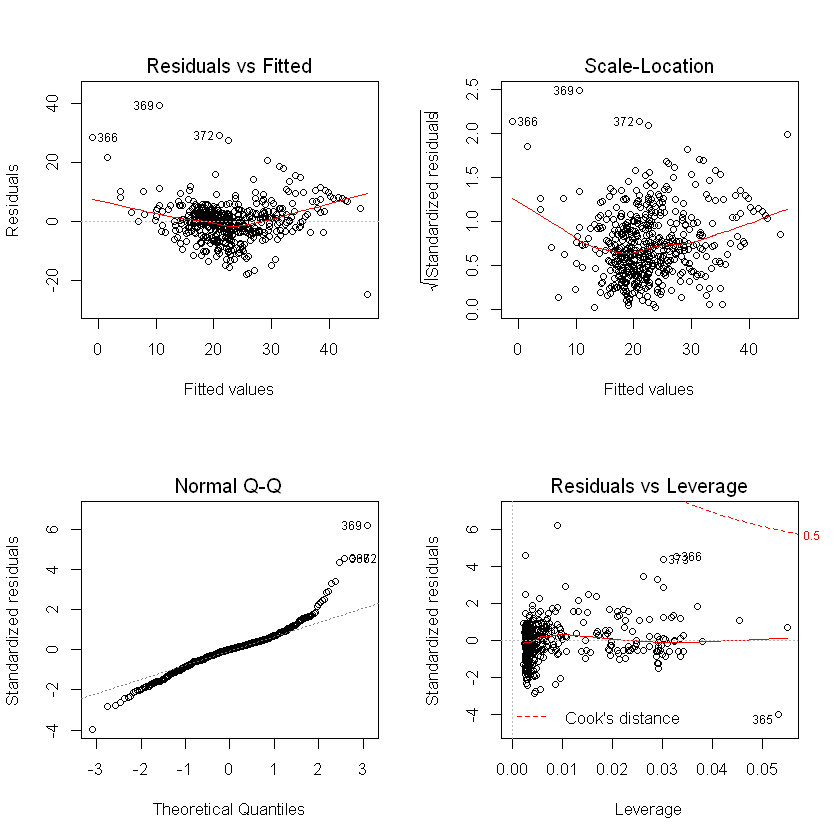

In [16]:
# diagnostic plots
layout(matrix(c(1,2,3,4),2,2)) # optional 4 graphs/page
plot(linearMod5)

Finally, we can see from the "Residuals vs Fitted" plot a linear relationship that is more promising than the rest.  This model in and of itself, while not perfect or great, won't be a bad place to start for predicting our "medv" variable.

## Wrapping Things Up

This notebook shows when we should and shouldn't use a linear regression model.  Generally speaking, when the correlation between two variables is low, then this means any sort of model that relies on linearity would not be a good choice.  This can also be verified too using a chart like those shown above.

Finally, we demonstrated how a linear model would look like with variables that have a weak relationship and with one with a stronger linear relationship.  Feel free to explore this concept further on your own.

For more information on how to become a better Data Analyst, be sure to visit www.datahuskies.com.  

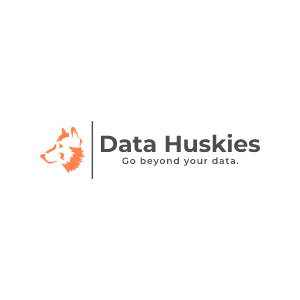